<a href="https://colab.research.google.com/github/fayrouz-mikhael/DataScience-Project/blob/master/project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
%matplotlib inline

In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)
schools_df = pd.read_csv('https://data.cityofnewyork.us/resource/23z9-6uk9.csv', usecols = ['postcode'])

train_df = train_df.drop(train_df[(train_df['size_sqft']>8000)& (train_df['rent']<10000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bathrooms']>=12) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bathrooms']==6) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)


train_df = train_df.drop(train_df[(train_df['bedrooms']>=8) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)

train_df = pd.merge(train_df,schools_df,left_on="addr_zip", right_on="postcode")
cf = submit2_df #retaining the dataframe in cf instead incase I want to look at the original without edits
cf.min_to_subway = cf.min_to_subway.fillna(cf.min_to_subway.mean(), axis=0) #Replacing empty values with the mean of the entire column
cf.year_built = cf.year_built.fillna(cf.year_built.median(), axis=0) #Replacing empty values with the median of the entire column

In [179]:
print(total_df)

      addr_unit  building_id  bedrooms  ...  floornumber  line postcode
0          #22A       551248         4  ...          NaN   NaN    11226
1          #22A       551248         4  ...          NaN   NaN    11226
2          #22A       551248         4  ...          NaN   NaN    11226
3          #22A       551248         4  ...          NaN   NaN    11226
4          #22A       551248         4  ...          NaN   NaN    11226
...         ...          ...       ...  ...          ...   ...      ...
39414       #30      1083148         1  ...          NaN   NaN    10460
39415       #30      1083148         1  ...          NaN   NaN    10460
39416       #30      1083148         1  ...          NaN   NaN    10460
39417       #30      1083148         1  ...          NaN   NaN    10460
39418        #2      1917055         0  ...          2.0   NaN    11423

[39419 rows x 39 columns]


In [180]:
total_df.sample(5).transpose()

,37656,2851,14088,33956,35837
addr_unit,#416,#3A,#24F,#1,#3A
building_id,1247200,376522,9184636,544876,9748
bedrooms,2,1,2,3,0
bathrooms,2,1,1,2,1
size_sqft,831,610,848,950,300
created_at,2018-06-18 17:06:00,2018-07-05 22:02:52,2018-06-25 06:10:42,2018-07-07 14:16:44,2018-05-02 11:05:49
addr_street,44-41 PURVES STREET,629 GRAND STREET,554 WEST 54 STREET,1198 NOSTRAND AVENUE,161 ATTORNEY STREET
addr_city,Long Island City,Brooklyn,New York,Brooklyn,New York
addr_zip,11101,11211,10019,11225,10002
addr_lat,40.7461,40.7116,40.7679,40.6582,40.7207


Build training data

In [0]:
feature_cols = [
     'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman'          
]
train_features = train_df[feature_cols] 
#train_features = total_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']
#train_target = total_df['rent']

Fit model

In [182]:
lreg = LinearRegression()
lreg.fit(train_features, train_target)

rf = RandomForestRegressor()
rf.fit(train_features, train_target)

DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(train_features, train_target);

gbr = GradientBoostingRegressor()
gbr.fit(train_features, train_target)

xgbr = xgb.XGBRegressor()
xgbr.fit(train_features, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Predict and Measure Using Test 1

In [183]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

# construct predictions 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

3895043.5489253034

Combine Data, Predict Values for Test 3

In [200]:
master_df = train_df.append(test_df, sort=False)
#master_df = total_df.append(test_df, sort=False)
master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']

rf.fit(master_features, master_target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [201]:
train_df.corr() #Looking at which features correlate the most with the rent from the training data
#total_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber,postcode
building_id,1.000000,0.011285,0.019804,0.012754,0.048910,0.010310,0.086095,0.098028,0.075765,-0.119924,0.033151,-0.006376,-0.022220,0.038740,-0.011072,0.020025,0.023112,0.038793,0.035484,0.016143,0.035873,0.009233,-0.016253,0.021268,0.126898,0.049034,0.010850,0.029158,0.012544,0.048910
bedrooms,0.011285,1.000000,0.516821,0.534927,0.169192,-0.128333,0.139493,0.115429,0.134170,-0.248946,-0.073151,0.015514,-0.261425,-0.308061,0.059710,0.055079,-0.058109,-0.232034,0.008893,0.108202,-0.151947,-0.107932,-0.234944,-0.092329,0.017111,-0.133126,0.364686,-0.006406,-0.168684,0.169192
bathrooms,0.019804,0.516821,1.000000,0.634828,-0.057868,0.029363,-0.056306,-0.063387,-0.067302,0.076368,0.005807,0.023780,0.091693,0.073620,0.129456,0.157844,0.046678,0.087425,0.058277,0.316304,0.049742,0.086392,0.090751,0.100820,0.107547,0.086037,0.664691,-0.013799,0.112287,-0.057868
size_sqft,0.012754,0.534927,0.634828,1.000000,0.003937,-0.032631,-0.022055,-0.010762,-0.005955,-0.001244,-0.011378,0.009458,0.034710,0.016130,0.179752,0.115646,0.034903,-0.000213,0.009830,0.275136,-0.013443,0.013783,0.019155,0.059115,0.141894,0.031671,0.678920,-0.078414,0.040638,0.003937
addr_zip,0.048910,0.169192,-0.057868,0.003937,1.000000,-0.617333,0.469361,0.953524,0.958312,-0.326009,0.008333,0.024649,-0.269801,-0.239233,-0.058307,-0.069854,-0.154536,-0.120031,0.015824,-0.030254,-0.037568,0.031405,-0.224172,-0.201904,-0.006080,-0.083933,-0.272522,0.108627,-0.281050,1.000000
addr_lat,0.010310,-0.128333,0.029363,-0.032631,-0.617333,1.000000,0.110256,-0.500243,-0.497758,0.197652,-0.002188,-0.028676,0.181888,0.170093,0.010890,0.052451,0.085254,0.094933,-0.022935,0.005793,0.060835,-0.009110,0.151377,0.158439,0.000052,0.057788,0.106228,-0.035069,0.184644,-0.617333
addr_lon,0.086095,0.139493,-0.056306,-0.022055,0.469361,0.110256,1.000000,0.521154,0.543558,-0.269109,-0.021355,-0.011851,-0.254159,-0.174353,-0.086055,-0.117622,-0.093719,-0.160507,-0.114815,-0.145597,-0.041507,-0.101761,-0.243717,-0.081808,-0.066278,-0.122507,-0.271445,0.047080,-0.221206,0.469361
bin,0.098028,0.115429,-0.063387,-0.010762,0.953524,-0.500243,0.521154,1.000000,0.990909,-0.276022,0.032115,0.023401,-0.204088,-0.169455,-0.069877,-0.068487,-0.148043,-0.054589,0.006913,-0.011035,0.018949,0.064991,-0.162608,-0.164115,0.008870,-0.029296,-0.273820,0.095567,-0.233453,0.953524
bbl,0.075765,0.134170,-0.067302,-0.005955,0.958312,-0.497758,0.543558,0.990909,1.000000,-0.312837,0.021033,0.018655,-0.245837,-0.208936,-0.063874,-0.075282,-0.150322,-0.101234,-0.015391,-0.029476,-0.012225,0.030811,-0.205413,-0.181573,-0.017424,-0.078053,-0.283833,0.074314,-0.265852,0.958312
floor_count,-0.119924,-0.248946,0.076368,-0.001244,-0.326009,0.197652,-0.269109,-0.276022,-0.312837,1.000000,0.170036,-0.012883,0.637954,0.552187,-0.039563,0.165435,0.149344,0.577444,0.186283,0.133551,0.414379,0.341441,0.647923,0.503414,0.109118,0.434747,0.201584,0.144299,0.766011,-0.326009


Create Submission File for test2

In [202]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = rf.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

13777456.469718406

In [203]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line  predictions fake_rent
rental_id                                   ...                             
7495531         #1J      2190883         1  ...     J       1300.0    3000.0
7494517         #4B        54685         0  ...     B       1364.7    3000.0
7438504        #1RR     18714016         0  ...    RR       1391.0    3000.0
7453258        #A21       701578         0  ...   NaN       1412.5    3000.0
7510405         #1A      1870690         0  ...     A       1413.0    3000.0
...             ...          ...       ...  ...   ...          ...       ...
7481848       #PH2C          313         4  ...    2C      26540.0    3000.0
7445098        #410       351502         2  ...    10      29885.6    3000.0
7470277     #19WEST         2464         4  ...   NaN      37440.0    3000.0
7500250         #7D        32875         5  ...     D      40390.0    3000.0
7492594         #3D         5260         4  ...     D      41380.0    3000.0

In [204]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = xgbr.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

13085143.089989644

In [205]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7441030         #4B       289630         0  ...     B   1403.331787    3000.0
7472128        #712      1606783         0  ...   NaN   1437.841064    3000.0
7471120          #1      1478710         0  ...   NaN   1538.520386    3000.0
7481896        #634      1677385         0  ...    34   1567.847656    3000.0
7509406       #634A      1677385         0  ...   34A   1578.173950    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  24388.707031    3000.0
7470277     #19WEST         2464         4  ...   NaN  32974.437500    3000.0
7481848       #PH2C          313         4  ...    2C  35374.839844    3000.0
7492594         #3D         5260         4  ...     D  36886.386719    3000.0
7500250         #7D        32875         5  ...     D  43521.320

In [206]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = gbr.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

12883100.457663354

In [207]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7441030         #4B       289630         0  ...     B   1456.213097    3000.0
7472128        #712      1606783         0  ...   NaN   1497.879396    3000.0
7481896        #634      1677385         0  ...    34   1565.755715    3000.0
7509406       #634A      1677385         0  ...   34A   1565.755715    3000.0
7492579         #4F     18356584         0  ...     F   1575.890608    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  24472.171218    3000.0
7470277     #19WEST         2464         4  ...   NaN  33307.137918    3000.0
7481848       #PH2C          313         4  ...    2C  34812.356421    3000.0
7492594         #3D         5260         4  ...     D  35782.114636    3000.0
7500250         #7D        32875         5  ...     D  42359.830

In [208]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = lreg.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

11666878.14366698

In [209]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7471120          #1      1478710         0  ...   NaN  -1106.719659    3000.0
7481980         NaN       264169         0  ...   NaN   -274.985873    3000.0
7490725         #1G     18742198         4  ...     G    512.139899    3000.0
7496794         #3L       389560         4  ...     L    529.338029    3000.0
7464202          #3       399808         4  ...   NaN    535.613181    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  15589.924455    3000.0
7492594         #3D         5260         4  ...     D  16439.932082    3000.0
7500250         #7D        32875         5  ...     D  19379.587304    3000.0
7481848       #PH2C          313         4  ...    2C  21139.496832    3000.0
7513006        #542       119011         1  ...    42  25055.338

In [210]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = DTR.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

14710379.356739279

In [211]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line  predictions fake_rent
rental_id                                   ...                             
7431121         #2K      1355704         0  ...     K       1250.0    3000.0
7500499         #1F       367906         0  ...     F       1250.0    3000.0
7445584         #2B       956329         1  ...     B       1250.0    3000.0
7429642         #5O      1354282         0  ...     O       1250.0    3000.0
7448752        #3CC       261526         1  ...    CC       1250.0    3000.0
...             ...          ...       ...  ...   ...          ...       ...
7480519     #13/14C        64603         5  ...  /14C      30000.0    3000.0
7506727         #8C        82996         4  ...     C      30000.0    3000.0
7470277     #19WEST         2464         4  ...   NaN      35000.0    3000.0
7492594         #3D         5260         4  ...     D      35000.0    3000.0
7500250         #7D        32875         5  ...     D      49500.0    3000.0

In [0]:
#files.download("sample_submission1.csv")

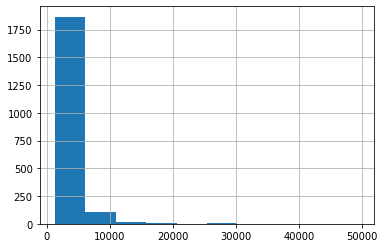

In [197]:
test['predictions'].hist() #Confirming largest predicted rent is 15516 visually. As expected we see that there are more apartments ranging from 2k-3k than any other price range.

In [198]:
submit2_df.isna().sum()

addr_unit                   22
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          2
bbl                          0
floor_count                  0
year_built                   0
min_to_subway                0
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                      2000
no_fee                       0
descript

In [215]:
submit1_features = submit1_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit1_df['predictions'] = rf.predict(submit2_features) 
submit1_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit1_df['fake_rent'] = np.ones(submit1_df['predictions'].shape) * master_target.median()
mean_squared_error(submit1_df['predictions'], submit1_df['fake_rent'])

6268536.193951148